In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

X = boston.data
y = boston.target
feature_names = boston.feature_names

In [2]:
import numpy as np

w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

In [3]:
# MSE
y_hat = X.dot(w)

# MSEはsigma^2の推定値として使うことができる
MSE = ((y - y_hat).T).dot(y - y_hat) / len(y)

In [4]:
y.var()

84.419556156165555

In [5]:
1 - MSE / y.var()

0.71366390210414465

In [6]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [11]:
print(X_rm.reshape(-1, 1), y)

[[  65.2]
 [  78.9]
 [  61.1]
 [  45.8]
 [  54.2]
 [  58.7]
 [  66.6]
 [  96.1]
 [ 100. ]
 [  85.9]
 [  94.3]
 [  82.9]
 [  39. ]
 [  61.8]
 [  84.5]
 [  56.5]
 [  29.3]
 [  81.7]
 [  36.6]
 [  69.5]
 [  98.1]
 [  89.2]
 [  91.7]
 [ 100. ]
 [  94.1]
 [  85.7]
 [  90.3]
 [  88.8]
 [  94.4]
 [  87.3]
 [  94.1]
 [ 100. ]
 [  82. ]
 [  95. ]
 [  96.9]
 [  68.2]
 [  61.4]
 [  41.5]
 [  30.2]
 [  21.8]
 [  15.8]
 [   2.9]
 [   6.6]
 [   6.5]
 [  40. ]
 [  33.8]
 [  33.3]
 [  85.5]
 [  95.3]
 [  62. ]
 [  45.7]
 [  63. ]
 [  21.1]
 [  21.4]
 [  47.6]
 [  21.9]
 [  35.7]
 [  40.5]
 [  29.2]
 [  47.2]
 [  66.2]
 [  93.4]
 [  67.8]
 [  43.4]
 [  59.5]
 [  17.8]
 [  31.1]
 [  21.4]
 [  36.8]
 [  33. ]
 [   6.6]
 [  17.5]
 [   7.8]
 [   6.2]
 [   6. ]
 [  45. ]
 [  74.5]
 [  45.8]
 [  53.7]
 [  36.6]
 [  33.5]
 [  70.4]
 [  32.2]
 [  46.7]
 [  48. ]
 [  56.1]
 [  45.1]
 [  56.8]
 [  86.3]
 [  63.1]
 [  66.1]
 [  73.9]
 [  53.6]
 [  28.9]
 [  77.3]
 [  57.8]
 [  69.6]
 [  76. ]
 [  36.9]
 [  62.5]


## 部屋数で単回帰

In [29]:
# X_rm = X[:,5].reshape(-1, 1)
X_rm = X[:,5][:,None]
from sklearn.linear_model import LinearRegression
slr_rm = LinearRegression()
slr_rm.fit(X_rm, y)
print(slr_rm.coef_, slr_rm.intercept_)

[ 9.10210898] -34.6706207764


In [25]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y, slr_rm.predict(X_rm)))
print(r2_score(y, slr_rm.predict(X_rm)))

43.6005517712
0.483525455991


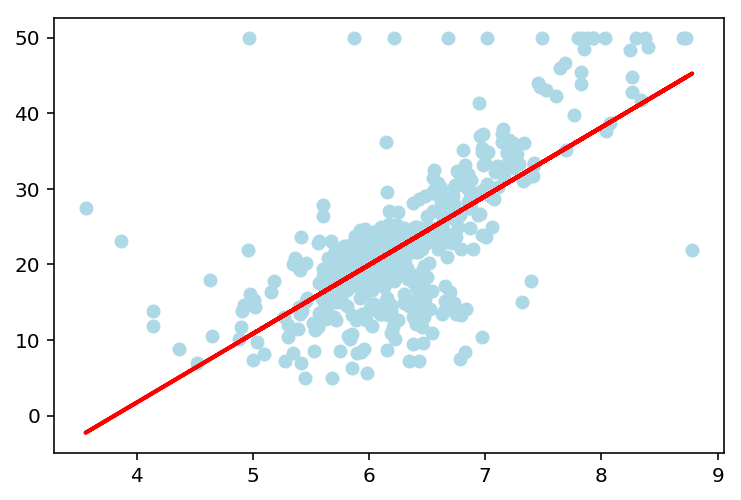

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return
lin_regplot(X_rm, y, slr_rm)

## 犯罪発生率 (crim) で単回帰

In [28]:
X_crim = X[:,0][:,None]
from sklearn.linear_model import LinearRegression
slr_crim = LinearRegression()
slr_crim.fit(X_rm, y)
print(slr_crim.coef_, slr_crim.intercept_)

[-0.41277468] 24.0162197635


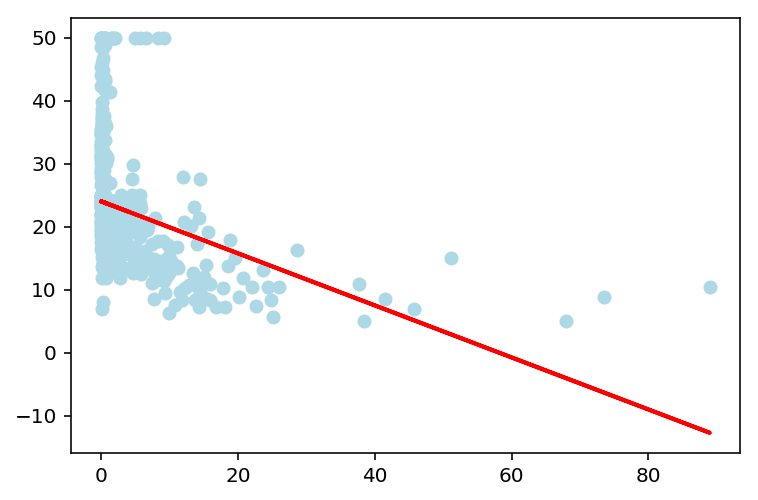

In [30]:
lin_regplot(X_crim, y, slr_crim)

↑この外れ値はそもそも全ての値で分析する必要があるのかという感じなので、RANSACなどを使い外す事を考える

In [33]:
print(mean_squared_error(y, slr_crim.predict(X_crim)))
print(r2_score(y, slr_crim.predict(X_crim)))

71.8523466653
0.148866092919


In [35]:
from sklearn.model_selection import train_test_split
X_rm_train, X_rm_test, y_train, y_test = train_test_split(X_rm, y, test_size=0.3, random_state=0)

In [36]:
# ho is hold out (one time splitting them to testing and training data)
slr_rm_ho = LinearRegression()
slr_rm_ho.fit(X_rm_train, y_train)
y_train_pred = slr_rm_ho.predict(X_rm_train)
y_test_pred = slr_rm_ho.predict(X_rm_test)

In [41]:
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

42.1576508631
47.0330474798
0.502649763004
0.435143648321


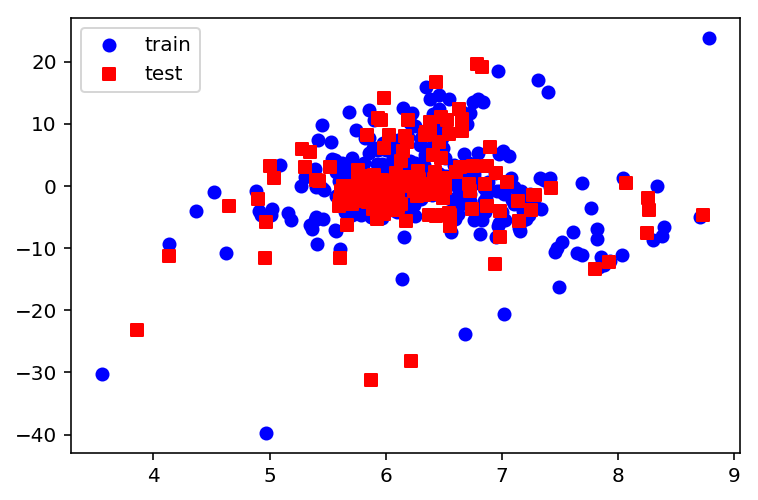

In [42]:
# 教材では横軸は目的変数になっているが、単回帰なので説明変数に変えている、
# →説明変数の値によって目的変数の分散が変わったりしていないかを確認するため
plt.scatter(X_rm_train[:,0], y_train_pred - y_train, c='blue', marker='o', label='train')
plt.scatter(X_rm_test[:,0], y_test_pred - y_test, c='red', marker='s', label='test')
plt.legend()

In [43]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
print(r2_score(y, y_pred))

0.740607742865


In [51]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
Rsq = []
for train, test in kf.split(X):
    lr = LinearRegression()
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    lr.fit(X_train, y_train)
    y_test_pred = lr.predict(X_test)
    Rsq.append(r2_score(y_test, y_test_pred))
print(sum(Rsq)/5)

0.350741350933


In [48]:
Rsq

[0.63861069352922895,
 0.71334431715342506,
 0.58645133625622958,
 0.078424954678299241,
 -0.26312454695461795]

In [52]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
Rsq = []
for train, test in kf.split(X):
    lr = LinearRegression()
    X_train, X_test, y_train, y_test = X_rm[train], X_rm[test], y[train], y[test]
    lr.fit(X_train, y_train)
    y_test_pred = lr.predict(X_test)
    Rsq.append(r2_score(y_test, y_test_pred))
print(sum(Rsq)/5)

-0.0295219199578


In [64]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
Rsq = []
X1 = X[:, 1:] #犯罪係数を使わないようにする
for train, test in kf.split(X):
    lr = LinearRegression()
    X_train, X_test, y_train, y_test = X1[train], X1[test], y[train], y[test]
    lr.fit(X_train, y_train)
    y_test_pred = lr.predict(X_test)
    Rsq.append(r2_score(y_test, y_test_pred))
print(sum(Rsq)/5)

0.383594683192


In [68]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
Rsq = []
X1 = X[:, [2,4,5,9,10,12]]
for train, test in kf.split(X):
    lr = LinearRegression()
    X_train, X_test, y_train, y_test = X1[train], X1[test], y[train], y[test]
    lr.fit(X_train, y_train)
    y_test_pred = lr.predict(X_test)
    Rsq.append(r2_score(y_test, y_test_pred))
print(sum(Rsq)/5)

0.367226037859


In [67]:
import numpy as np

np.corrcoef(X.T, y)[:, -1]

array([-0.38583169,  0.36044534, -0.48372516,  0.17526018, -0.42732077,
        0.69535995, -0.37695457,  0.24992873, -0.38162623, -0.46853593,
       -0.50778669,  0.33346082, -0.73766273,  1.        ])